# Probability & Statistics

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Probability Theory provides a mathematical framework for computing the probability of complex events, given that we have a notion for the probability of the basic parts.

#### Simulating Coin Flips

Let's consider heads = 1 and tails = -1. As we increase the number of coin tosses (k), the sum of the results should tend to converge around 0. Then we can repeat the number of times that we run the experiment (n) and create a histogram of the results of each trial.

In [77]:
def flip_coin(k, n):
    tosses = np.random.choice([-1, 1], (k, n))
    total = np.sum(tosses, axis=0)
    return tosses, total

In [96]:
# Another way of simulating coin tosses
def generate_coin_toss(k, n):
    X = 2 * (np.random.rand(k, n) > 0.5) - 1
    S = np.sum(X, axis=0)
    return S

In [78]:
# Flip 10 coins, repeat 3 times
tosses, total = flip_coin(10, 3)
print(tosses)

[[-1  1 -1]
 [ 1 -1 -1]
 [-1 -1 -1]
 [ 1 -1  1]
 [-1 -1 -1]
 [ 1 -1  1]
 [ 1  1  1]
 [-1 -1  1]
 [ 1  1 -1]
 [ 1 -1 -1]]


In [79]:
# Then we can sum the results for each experiment
total

array([ 2, -4, -2])

In [109]:
# Next, simulate 100 coin tosses, 1000 times
k = 100
sim_tosses, sim_total = flip_coin(k, 1000)

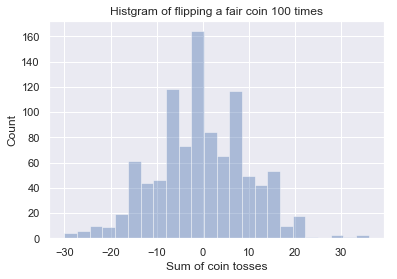

In [110]:
sns.distplot(sim_total, kde=False)
plt.title("Histgram of flipping a fair coin {} times".format(k))
plt.xlabel("Sum of coin tosses")
plt.ylabel("Count")
plt.show()

In [112]:
# Next, simulate 1000 coin tosses, 1000 times
k = 1000
sim_tosses, sim_total = flip_coin(1000, 1000)

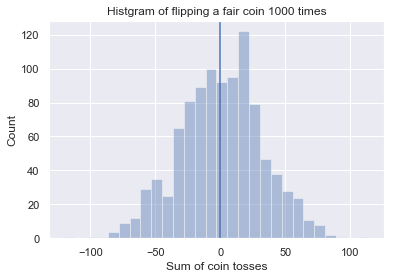

In [114]:
sns.distplot(sim_total, kde=False)
plt.title("Histgram of flipping a fair coin {} times".format(k))
plt.xlabel("Sum of coin tosses")
plt.ylabel("Count")
plt.show()

Using probability theory, we can determine the bounds of the sum of these coin tosses, namely, that the probability of $|S_k| \ge 4\sqrt{k}$ is smaller than $2x10^{-8}$.

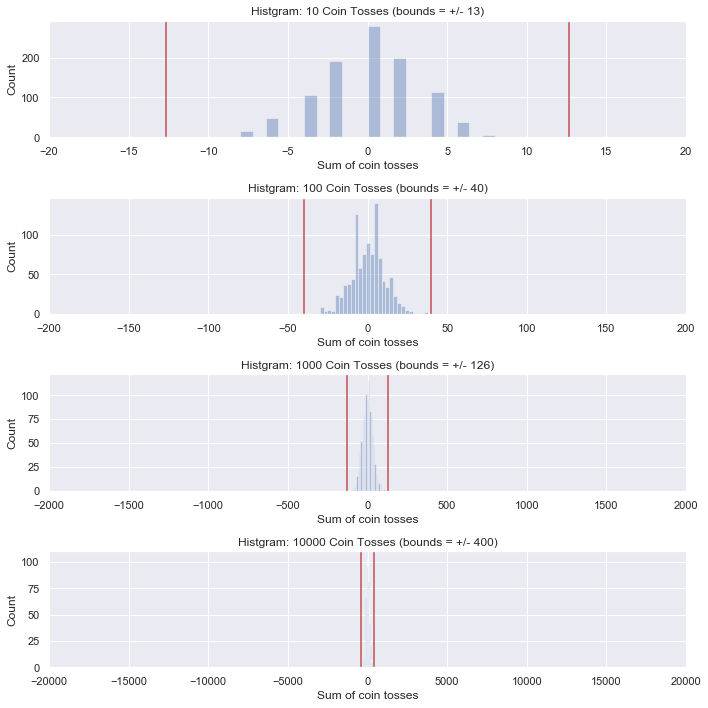

In [146]:
fig, ax = plt.subplots(4, 1, figsize=(10,10))

for i in range(1,5):
    k = 10**i
    sim_tosses, sim_total = flip_coin(k, 1000)
    bounds = 4 * np.sqrt(k)
    sns.distplot(sim_total, kde=False, ax=ax[i-1])
    ax[i-1].set_xlim([-k-1*k, k+1*k])
    ax[i-1].axvline(x=bounds, c='r')
    ax[i-1].axvline(x=-1*bounds, c='r')
    ax[i-1].set_title("Histgram: {} Coin Tosses (bounds = +/- {:.0f})".format(k, bounds))
    ax[i-1].set_xlabel("Sum of coin tosses")
    ax[i-1].set_ylabel("Count")
plt.tight_layout()

#### Summary

Coin toss experiments were simulated using ```numpy```, with heads and tails assigned values, $x_h = 1$ and $x_t = -1$, each occuring with an equal probability of $1/2$. The sum of $k$ coin tosses, $S_k = x_1 + x_2 + ... + x_k$, converges around zero and is almost always within the range $[-4\sqrt{k}, +4\sqrt{k}]$.
